# One Iteration of Repetition Code

First, we recreate the repetition code circuit that is used in the original paper for the case d=3. Instead of running the circuit on Sycamore professor, we create a noise model with equal error rates. In order to replicate decoupling errors, we add Identity gates throughout the circuit.

In [58]:
from qiskit import QuantumCircuit, Aer
from qiskit.providers.aer.noise import pauli_error, QuantumError, NoiseModel


# Set the error rates
p_x = 4.1e-2
p_cnot = 6.6e-3
p_meas = 1.9e-2
p_h = 1.1e-3
p_id = 6.5e-4


# Define the errors
error_x = pauli_error([('X', p_x), ('I', 1 - p_x)])
error_cnot = pauli_error([('X', p_cnot), ('I', 1 - p_cnot)]).tensor(pauli_error([('X', p_cnot), ('I', 1 - p_cnot)]))
error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
error_h = pauli_error([('X', p_h), ('I', 1 - p_h)])
error_id = pauli_error([('X', p_id), ('I', 1 - p_id)])


# Add the errors to the noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_x, 'x')
noise_model.add_all_qubit_quantum_error(error_cnot, 'cx')
noise_model.add_all_qubit_quantum_error(error_meas, 'measure')
noise_model.add_all_qubit_quantum_error(error_h, 'h')
noise_model.add_all_qubit_quantum_error(error_id, 'id')

# Apply the noise model to a circuit
qc = QuantumCircuit(5, 2)


#qc.h(0)
#qc.id(0)
#qc.x(0)
#qc.cx(0, 1)

#Simulating Environment Noise
qc.id(0)
qc.id(1)
qc.id(2)
qc.id(3)
qc.id(4)


qc.barrier(range(5))

#Error Identification
qc.cx(0,1)
qc.cx(2,1)

qc.cx(2,3)
qc.cx(4,3)
qc.barrier(range(5))

#Simulating Environment Noise
qc.id(0)
qc.id(1)
qc.id(2)
qc.id(3)
qc.id(4)

qc.barrier(range(5))

qc.measure([1, 3], [0, 1])



print(qc)

backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, noise_model=noise_model, shots=1024)

print(job.result().get_counts())


     ┌───┐ ░                      ░ ┌───┐ ░       
q_0: ┤ I ├─░───■──────────────────░─┤ I ├─░───────
     ├───┤ ░ ┌─┴─┐┌───┐           ░ ├───┤ ░ ┌─┐   
q_1: ┤ I ├─░─┤ X ├┤ X ├───────────░─┤ I ├─░─┤M├───
     ├───┤ ░ └───┘└─┬─┘           ░ ├───┤ ░ └╥┘   
q_2: ┤ I ├─░────────■────■────────░─┤ I ├─░──╫────
     ├───┤ ░           ┌─┴─┐┌───┐ ░ ├───┤ ░  ║ ┌─┐
q_3: ┤ I ├─░───────────┤ X ├┤ X ├─░─┤ I ├─░──╫─┤M├
     ├───┤ ░           └───┘└─┬─┘ ░ ├───┤ ░  ║ └╥┘
q_4: ┤ I ├─░──────────────────■───░─┤ I ├─░──╫──╫─
     └───┘ ░                      ░ └───┘ ░  ║  ║ 
c: 2/════════════════════════════════════════╩══╩═
                                             0  1 
{'00': 949, '01': 32, '10': 41, '11': 2}


With one iteration of repetition code (and no decoding), we see almost no error.

# 10 Iterations of Error Detection from Repetition Code

{'000': 735, '001': 77, '010': 119, '100': 66, '110': 10, '011': 8, '101': 8, '111': 1}


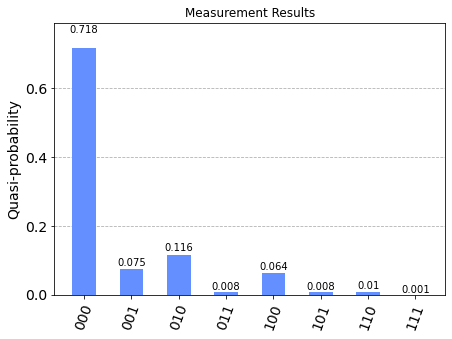

In [53]:
from qiskit import QuantumCircuit, Aer
from qiskit.providers.aer.noise import pauli_error, QuantumError, NoiseModel
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt


# Set the error rates
p_x = 4.1e-2
p_cnot = 6.6e-3
p_meas = 1.9e-2
p_h = 1.1e-3
p_id = 6.5e-4


# Define the errors
error_x = pauli_error([('X', p_x), ('I', 1 - p_x)])
error_cnot = pauli_error([('X', p_cnot), ('I', 1 - p_cnot)]).tensor(pauli_error([('X', p_cnot), ('I', 1 - p_cnot)]))
error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
error_h = pauli_error([('X', p_h), ('I', 1 - p_h)])
error_id = pauli_error([('X', p_id), ('I', 1 - p_id)])


# Add the errors to the noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_x, 'x')
noise_model.add_all_qubit_quantum_error(error_cnot, 'cx')
noise_model.add_all_qubit_quantum_error(error_meas, 'measure')
noise_model.add_all_qubit_quantum_error(error_h, 'h')
noise_model.add_all_qubit_quantum_error(error_id, 'id')


# Apply the noise model to a circuit

qc = QuantumCircuit(5, 3)


for i in range(10):

    #Simulating Environment Noise
    qc.id(0)
    qc.id(1)
    qc.id(2)
    qc.id(3)
    qc.id(4)


    qc.barrier(range(5))

    #Error Identification
    qc.cx(0,1)
    qc.cx(2,1)

    qc.cx(2,3)
    qc.cx(4,3)
    qc.barrier(range(5))

    #Simulating Environment Noise
    qc.id(0)
    qc.id(1)
    qc.id(2)
    qc.id(3)
    qc.id(4)

    qc.barrier(range(5))
    
  





#print(qc)


qc.measure([0, 2, 4], [0, 1, 2])
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, noise_model=noise_model, shots=1024)
print(job.result().get_counts())

counts = job.result().get_counts()
normalized_counts = {state: count / sum(counts.values()) for state, count in counts.items()}

plot_histogram(normalized_counts, title='Measurement Results')





Logical error rate after 10 iterations is approximately 2.7%

# 20 Iterations of Error Detection from Repetition Code

{'010': 156, '000': 602, '001': 94, '111': 7, '100': 85, '011': 29, '110': 33, '101': 18}


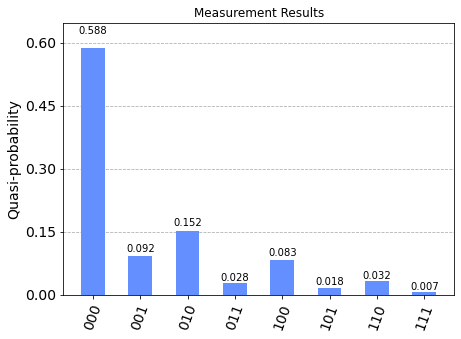

In [54]:
from qiskit import QuantumCircuit, Aer
from qiskit.providers.aer.noise import pauli_error, QuantumError, NoiseModel
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt


# Set the error rates
p_x = 4.1e-2
p_cnot = 6.6e-3
p_meas = 1.9e-2
p_h = 1.1e-3
p_id = 6.5e-4


# Define the errors
error_x = pauli_error([('X', p_x), ('I', 1 - p_x)])
error_cnot = pauli_error([('X', p_cnot), ('I', 1 - p_cnot)]).tensor(pauli_error([('X', p_cnot), ('I', 1 - p_cnot)]))
error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
error_h = pauli_error([('X', p_h), ('I', 1 - p_h)])
error_id = pauli_error([('X', p_id), ('I', 1 - p_id)])


# Add the errors to the noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_x, 'x')
noise_model.add_all_qubit_quantum_error(error_cnot, 'cx')
noise_model.add_all_qubit_quantum_error(error_meas, 'measure')
noise_model.add_all_qubit_quantum_error(error_h, 'h')
noise_model.add_all_qubit_quantum_error(error_id, 'id')


# Apply the noise model to a circuit

qc = QuantumCircuit(5, 3)


for i in range(20):

    #Simulating Environment Noise
    qc.id(0)
    qc.id(1)
    qc.id(2)
    qc.id(3)
    qc.id(4)


    qc.barrier(range(5))

    #Error Identification
    qc.cx(0,1)
    qc.cx(2,1)

    qc.cx(2,3)
    qc.cx(4,3)
    qc.barrier(range(5))

    #Simulating Environment Noise
    qc.id(0)
    qc.id(1)
    qc.id(2)
    qc.id(3)
    qc.id(4)

    qc.barrier(range(5))
    
  





#print(qc)


qc.measure([0, 2, 4], [0, 1, 2])
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, noise_model=noise_model, shots=1024)
print(job.result().get_counts())

counts = job.result().get_counts()
normalized_counts = {state: count / sum(counts.values()) for state, count in counts.items()}

plot_histogram(normalized_counts, title='Measurement Results')


Logical error rate of approximately 8.5%

# 30 Iterations of Error Detection from Repetition Code

{'100': 114, '001': 119, '000': 446, '110': 48, '010': 217, '011': 40, '111': 12, '101': 28}


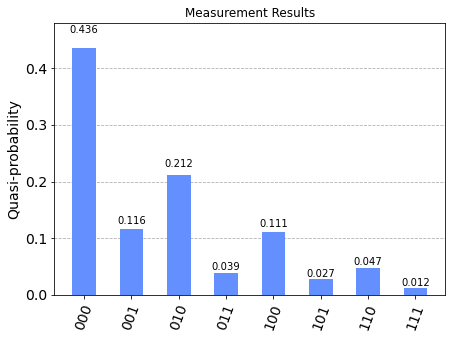

In [56]:
from qiskit import QuantumCircuit, Aer
from qiskit.providers.aer.noise import pauli_error, QuantumError, NoiseModel
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt


# Set the error rates
p_x = 4.1e-2
p_cnot = 6.6e-3
p_meas = 1.9e-2
p_h = 1.1e-3
p_id = 6.5e-4


# Define the errors
error_x = pauli_error([('X', p_x), ('I', 1 - p_x)])
error_cnot = pauli_error([('X', p_cnot), ('I', 1 - p_cnot)]).tensor(pauli_error([('X', p_cnot), ('I', 1 - p_cnot)]))
error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
error_h = pauli_error([('X', p_h), ('I', 1 - p_h)])
error_id = pauli_error([('X', p_id), ('I', 1 - p_id)])


# Add the errors to the noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_x, 'x')
noise_model.add_all_qubit_quantum_error(error_cnot, 'cx')
noise_model.add_all_qubit_quantum_error(error_meas, 'measure')
noise_model.add_all_qubit_quantum_error(error_h, 'h')
noise_model.add_all_qubit_quantum_error(error_id, 'id')


# Apply the noise model to a circuit

qc = QuantumCircuit(5, 3)


for i in range(30):

    #Simulating Environment Noise
    qc.id(0)
    qc.id(1)
    qc.id(2)
    qc.id(3)
    qc.id(4)


    qc.barrier(range(5))

    #Error Identification
    qc.cx(0,1)
    qc.cx(2,1)

    qc.cx(2,3)
    qc.cx(4,3)
    qc.barrier(range(5))

    #Simulating Environment Noise
    qc.id(0)
    qc.id(1)
    qc.id(2)
    qc.id(3)
    qc.id(4)

    qc.barrier(range(5))
    
  





#print(qc)


qc.measure([0, 2, 4], [0, 1, 2])
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, noise_model=noise_model, shots=1024)
print(job.result().get_counts())

counts = job.result().get_counts()
normalized_counts = {state: count / sum(counts.values()) for state, count in counts.items()}

plot_histogram(normalized_counts, title='Measurement Results')


Logical error rate of approximately 12.5%

# 40 Iterations of Error Detection from Repetition Code

{'000': 393, '001': 130, '110': 70, '010': 200, '111': 22, '100': 122, '011': 52, '101': 35}


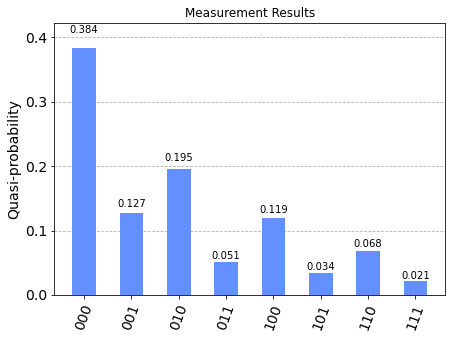

In [59]:
# from qiskit import QuantumCircuit, Aer
from qiskit.providers.aer.noise import pauli_error, QuantumError, NoiseModel
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt


# Set the error rates
p_x = 4.1e-2
p_cnot = 6.6e-3
p_meas = 1.9e-2
p_h = 1.1e-3
p_id = 6.5e-4


# Define the errors
error_x = pauli_error([('X', p_x), ('I', 1 - p_x)])
error_cnot = pauli_error([('X', p_cnot), ('I', 1 - p_cnot)]).tensor(pauli_error([('X', p_cnot), ('I', 1 - p_cnot)]))
error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
error_h = pauli_error([('X', p_h), ('I', 1 - p_h)])
error_id = pauli_error([('X', p_id), ('I', 1 - p_id)])


# Add the errors to the noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_x, 'x')
noise_model.add_all_qubit_quantum_error(error_cnot, 'cx')
noise_model.add_all_qubit_quantum_error(error_meas, 'measure')
noise_model.add_all_qubit_quantum_error(error_h, 'h')
noise_model.add_all_qubit_quantum_error(error_id, 'id')


# Apply the noise model to a circuit

qc = QuantumCircuit(5, 3)


for i in range(40):

    #Simulating Environment Noise
    qc.id(0)
    qc.id(1)
    qc.id(2)
    qc.id(3)
    qc.id(4)


    qc.barrier(range(5))

    #Error Identification
    qc.cx(0,1)
    qc.cx(2,1)

    qc.cx(2,3)
    qc.cx(4,3)
    qc.barrier(range(5))

    #Simulating Environment Noise
    qc.id(0)
    qc.id(1)
    qc.id(2)
    qc.id(3)
    qc.id(4)

    qc.barrier(range(5))
    
  





#print(qc)


qc.measure([0, 2, 4], [0, 1, 2])
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, noise_model=noise_model, shots=1024)
print(job.result().get_counts())

counts = job.result().get_counts()
normalized_counts = {state: count / sum(counts.values()) for state, count in counts.items()}

plot_histogram(normalized_counts, title='Measurement Results')


Logical error rate of approximately 17.4%